In [6]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "10"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [7]:
# Tesorflow 
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [8]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3012356871293853950
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1745276110
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4974166762295194934
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


# 이미지 분류기


In [9]:
fasion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fasion_mnist.load_data()

In [10]:
X_valid, X_train = X_train_full[0:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[0:5000], y_train_full[5000:]
X_test = X_test/255.0

[4 0 7 ... 3 0 5]
[4]
Coat


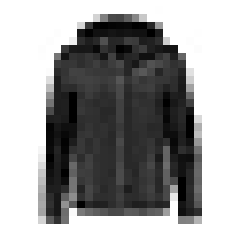

In [11]:
classNames = ["T-Shirt", "Trouser", "PullOver", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]
print(y_train)
print([y_train[0]])
print(classNames[y_train[0]])
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Flatten)             (None, 784)               0         
                                                                 
 Layer1 (Dense)              (None, 300)               235500    
                                                                 
 Layer2 (Dense)              (None, 100)               30100     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


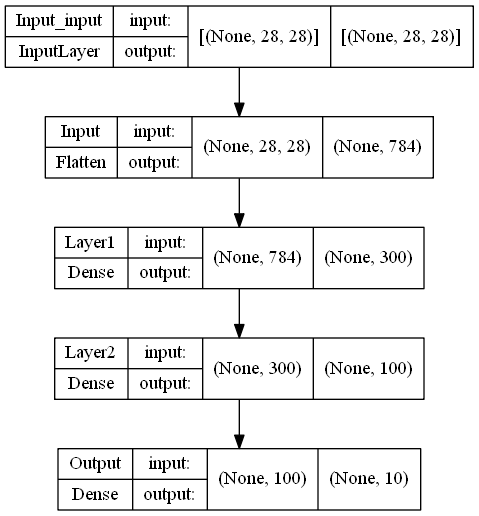

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28], name="Input"))
model.add(keras.layers.Dense(300, activation="relu", name="Layer1"))
model.add(keras.layers.Dense(100, activation="relu", name="Layer2"))
model.add(keras.layers.Dense(10, activation="softmax", name="Output"))
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [13]:
hidden1 = model.layers[1]
print(hidden1.name)
print(model.get_layer(hidden1.name) is hidden1)
weights, biases = hidden1.get_weights()
print(weights.shape)
print(weights)
print(biases.shape)
print(biases)

Layer1
True
(784, 300)
[[-0.00292847  0.05229349 -0.0102758  ... -0.029405   -0.04267196
  -0.0615991 ]
 [-0.00193931 -0.03371345 -0.03474586 ...  0.04664199  0.07395868
   0.01356589]
 [-0.02176172  0.05892821  0.00131059 ... -0.06668811  0.00735059
  -0.01358107]
 ...
 [ 0.05449253  0.00340828  0.04091871 ... -0.02421423  0.06841639
   0.06287557]
 [ 0.03398747 -0.05417096 -0.02400006 ...  0.02815764 -0.03478817
  -0.02788637]
 [ 0.00860056 -0.0052712   0.02252176 ...  0.00075617 -0.06318983
  -0.00108869]]
(300,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [14]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [15]:
# with tf.device("/device:CPU:0"):
#     history = model.fit(X_train, y_train, epochs=30,
#                     validation_data=(X_valid, y_valid))
with tf.device("/device:GPU:0"):
    history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7224 - accuracy: 0.7593 - val_loss: 0.6554 - val_accuracy: 0.7602
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4882 - accuracy: 0.8288 - val_loss: 0.4549 - val_accuracy: 0.8432
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4443 - accuracy: 0.8443 - val_loss: 0.4353 - val_accuracy: 0.8494
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4162 - accuracy: 0.8532 - val_loss: 0.4210 - val_accuracy: 0.8550
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3962 - accuracy: 0.8617 - val_loss: 0.4473 - val_accuracy: 0.8516
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3799 - accuracy: 0.8673 - val_loss: 0.4031 - val_accuracy: 0.8606
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3674 - accuracy: 0.8703 - val_loss: 0.3604 - val_accuracy:

그림 저장: keras_learning_curves_plot


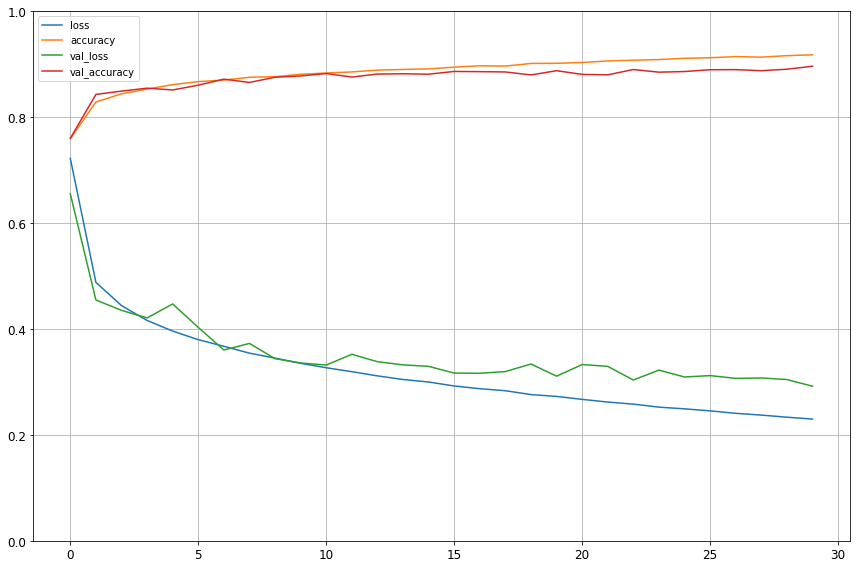

In [16]:
import pandas as pd 
pd.DataFrame(history.history).plot(figsize= (12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [17]:
with tf.device("/device:GPU:0"):
    model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3208 - accuracy: 0.8848


In [18]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))
y_pred = np.argmax(model.predict(X_new), axis=-1)
print("Predict")
print(y_pred)
print(np.array(classNames)[y_pred])
y_new = y_test[:3]
print("Answer")
print(y_new)
print(np.array(classNames)[y_new])

[[0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.98]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
Predict
[9 2 1]
['Boot' 'PullOver' 'Trouser']
Answer
[9 2 1]
['Boot' 'PullOver' 'Trouser']


그림 저장: fashion_mnist_images_plot


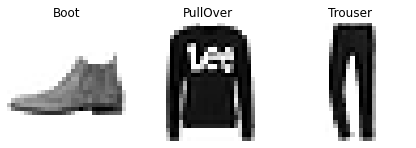

In [19]:
y_new = y_test[:3]
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(classNames[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# 회귀 MLP

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [21]:
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(1))

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

with tf.device("/device:GPU:0"):
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.6419 - val_loss: 0.8556
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4875 - val_loss: 0.4656

[[0.38838398]
 [1.6793036 ]
 [3.1016128 ]]
[0.477   0.458   5.00001]


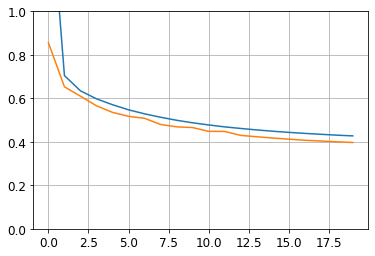

In [23]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 함수형 API
##### Wide & Deep

In [24]:
np.random.seed(42)
tf.random.set_seed(42)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_6[0][0]']          

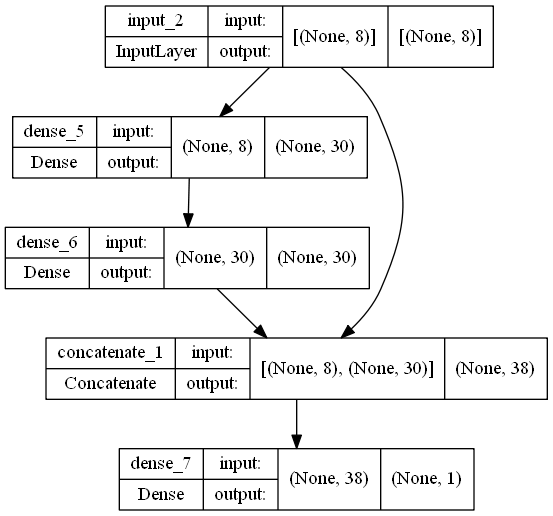

In [26]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [32]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

with tf.device("/device:GPU:0"):
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)
print(mse_test)
print(y_pred)


Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3710 - val_loss: 0.3723
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3701 - val_loss: 0.4358
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3692 - val_loss: 0.4053
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3681 - val_loss: 0.3778
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3676 - val_loss: 0.3728
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3663 - val_loss: 0.3961
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3659 - val_loss: 0.3731
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3649 - val_loss: 0.3578
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3640 - val_loss: 0.3879
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3633 - val_loss: 0.3941

와이드나 딥 경로에 다른 입력 특성을 전달 <br/>
-와이드 경로 :  특성 0~4 (5개의 특성) <br/>
 -딥 경로 : 특성 2~7 (6개의 특성) <br/>
-특성 2,3,4는 양쪽에 모두 전달

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                            

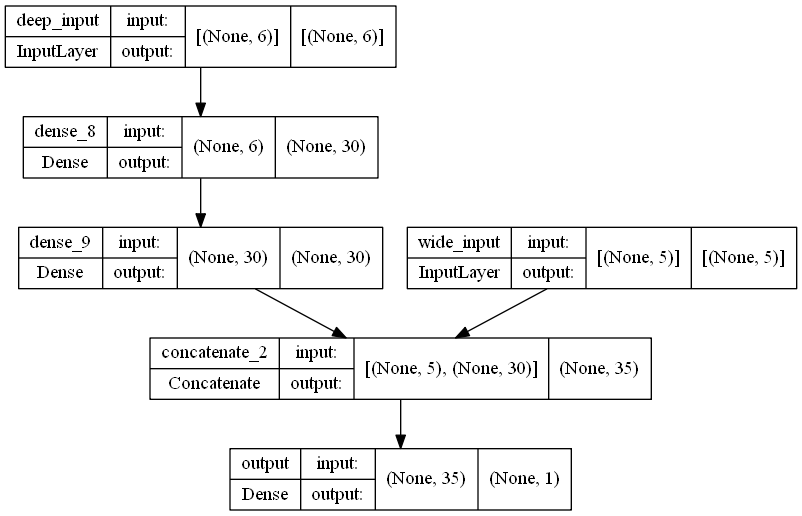

In [33]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [34]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 4ms/step - loss: 2.1094 - val_loss: 1.0291
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7849 - val_loss: 0.6906
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6517 - val_loss: 0.6051
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5964 - val_loss: 0.5448
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5594 - val_loss: 0.5131
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5310 - val_loss: 0.4875
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5082 - val_loss: 0.4678
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4895 - val_loss: 0.4510
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4746 - val_loss: 0.4377
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4639 - val_loss: 0.4271

규제를 위한 보조 출력 추가

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 30)           930         ['dense_10[0][0]']               
                                                                                            

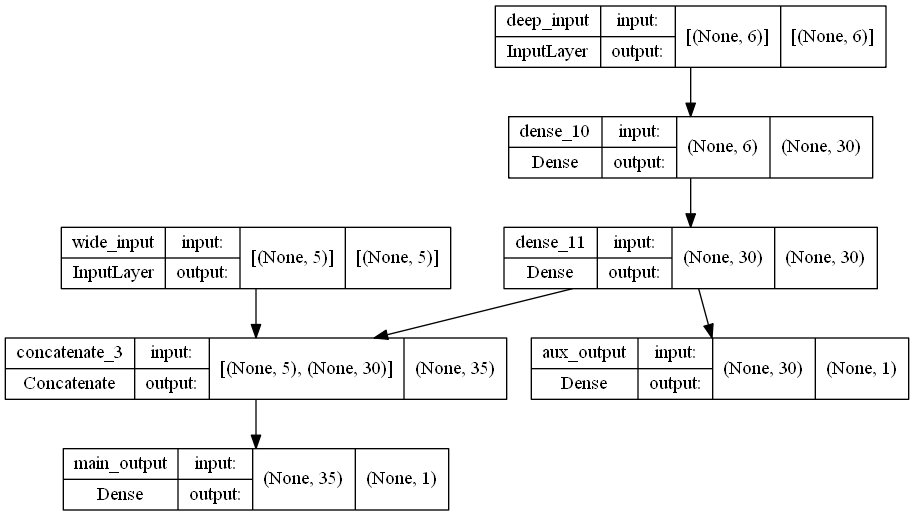

In [35]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [46]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
with tf.device("/device:GPU:0"):
    history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                        validation_data=((X_valid_A, X_valid_B), y_valid))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))
print(total_loss, main_loss, aux_loss)
print(y_pred)


Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3302 - main_output_loss: 0.3187 - aux_output_loss: 0.4336 - val_loss: 0.3347 - val_main_output_loss: 0.3196 - val_aux_output_loss: 0.4701
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3292 - main_output_loss: 0.3179 - aux_output_loss: 0.4317 - val_loss: 0.3390 - val_main_output_loss: 0.3259 - val_aux_output_loss: 0.4565
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3287 - main_output_loss: 0.3175 - aux_output_loss: 0.4290 - val_loss: 0.3627 - val_main_output_loss: 0.3527 - val_aux_output_loss: 0.4531
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3279 - main_output_loss: 0.3168 - aux_output_loss: 0.4278 - val_loss: 0.3294 - val_main_output_loss: 0.3144 - val_aux_output_loss: 0.4643
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3278 - main_output_loss: 0.3170 - aux_output_loss: 0.4252 - val_loss

# 서브클래싱 API

In [52]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

In [55]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
with tf.device("/device:GPU:0"):
    history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                        validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
print(total_loss, main_loss, aux_loss )
print(y_pred_main, y_pred_aux)

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4984 - output_1_loss: 0.4363 - output_2_loss: 1.0569 - val_loss: 0.5115 - val_output_1_loss: 0.4363 - val_output_2_loss: 1.1883
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4948 - output_1_loss: 0.4342 - output_2_loss: 1.0407 - val_loss: 0.5170 - val_output_1_loss: 0.4469 - val_output_2_loss: 1.1486
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4914 - output_1_loss: 0.4321 - output_2_loss: 1.0249 - val_loss: 0.5136 - val_output_1_loss: 0.4472 - val_output_2_loss: 1.1105
Epoch 4/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4880 - output_1_loss: 0.4300 - output_2_loss: 1.0097 - val_loss: 0.5151 - val_output_1_loss: 0.4525 - val_output_2_loss: 1.0785
Epoch 5/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4852 - output_1_loss: 0.4286 - output_2_loss: 0.9943 - val_loss: 0.5058 - val_output_1_loss: 0.4455 - val_ou

# 저장과 복원

In [56]:
np.random.seed(42)
tf.random.set_seed(42)

In [57]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [58]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.8866 - val_loss: 0.7125
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5934 - val_loss: 0.5802
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5033 - val_loss: 0.4947
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4854 - val_loss: 0.4860
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4709 - val_loss: 0.4550
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4578 - val_loss: 0.4412
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4382


In [59]:
model.save("my_keras_model.h5")

In [60]:
model = keras.models.load_model("my_keras_model.h5")

In [61]:
model.predict(X_new)

array([[0.5398443],
       [1.6505727],
       [3.0097804]], dtype=float32)

In [62]:
model.save_weights("my_keras_weights.ckpt")

In [63]:
model.load_weights("my_keras_weights.ckpt")

# 훈련 과정에서 콜백 사용하기

In [64]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [65]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [67]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") 
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4393 - val_loss: 0.4109
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4315 - val_loss: 0.4267
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.3951


In [68]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3949 - val_loss: 0.3696
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3923 - val_loss: 0.3683
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3898 - val_loss: 0.3651
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3873 - val_loss: 0.3630
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3852 - val_loss: 0.3609
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3829 - val_loss: 0.3584
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3808 - val_loss: 0.3564
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3788 - val_loss: 0.3559
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3769 - val_loss: 0.3553
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3749 - val_lo

In [69]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [70]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

356/363 [============================>.] - ETA: 0s - loss: 0.3472
val/train: 1.05
363/363 [==============================] - 1s 4ms/step - loss: 0.3476 - val_loss: 0.3657


# 텐서보드

In [71]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [72]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_02_13-16_25_44'

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [74]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 2.0148 - val_loss: 1.4015
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7736 - val_loss: 1.3614
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6815 - val_loss: 0.8409
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6134 - val_loss: 0.5903
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5653 - val_loss: 0.5378
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5242 - val_loss: 0.5178
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4955 - val_loss: 0.4710
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4729 - val_loss: 0.4585
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4546 - val_loss: 0.4200
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4411 - val_loss: 0.4036

텐서보드 서버를 실행하는 한 가지 방법은 터미널에서 직접 실행하는 것입니다. 터미널을 열고 텐서보드가 설치된 가상 환경을 활성화합니다. 그다음 노트북 디렉토리로 이동하여 다음 명령을 입력하세요:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

그다음 웹 브라우저를 열고 [localhost:6006](http://localhost:6006)에 접속하면 텐서보드를 사용할 수 있습니다. 사용이 끝나면 터미널에서 Ctrl-C를 눌러 텐서보드 서버를 종료하세요.

In [76]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_02_13-16_28_11'

In [77]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [79]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.5327 - val_loss: 13.3855
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7937 - val_loss: 0.7393
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3852 - val_loss: 0.6076
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3730 - val_loss: 0.3919
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3650 - val_loss: 0.3724
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3539 - val_loss: 0.4404
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3548 - val_loss: 0.4080
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3432 - val_loss: 0.3145
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3347 - val_loss: 0.3489
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3308 - val_loss: 0.320

In [80]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# 하이퍼파라미터 튜닝

In [81]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [82]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model


In [83]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\Jin\AppData\Local\Temp/ipykernel_1808/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [84]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 1.0896 - val_loss: 20.7784
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7607 - val_loss: 5.0329
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5457 - val_loss: 0.5493
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4060 - val_l

In [85]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3347


In [86]:
y_pred = keras_reg.predict(X_new)

**경고**: 다음 셀은 훈련이 끝날 때 에러가 납니다. 이는 최근 사이킷런의 변화때문에 생긴 [케라스 이슈 #13586](https://github.com/keras-team/keras/issues/13586) 때문입니다. 이 이슈를 해결하기 위한 [풀 리퀘스트 #13598](https://github.com/keras-team/keras/pull/13598)가 있으므로 곧 해결될 것 같습니다. 그때까지는 `.tolist()`와 `.rvs(1000).tolist()`를 추가해 사용합니다.

In [87]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=4, n_hidden=1, learning_rate=0.022174573948353458 .....
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 1s 3ms/step - loss: 0.7861 - val_loss: 0.4686
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4791 - val_loss: 0.4996
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4595 - val_loss: 0.4157
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4497 - val_loss: 0.4080
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4455 - val_loss: 0.5519
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4427 - val_loss: 0.4785
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4469 - val_loss: 0.5038
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4394 - val_loss: 0.6504
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4631 - val_loss: 0.4199
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4527 - val_loss: 0.5007
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s


242/242 [==============================] - 1s 3ms/step - loss: 0.8053 - val_loss: 0.4446
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4572 - val_loss: 0.4158
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4375 - val_loss: 0.3958
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4299 - val_loss: 0.3925
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4283 - val_loss: 0.3927
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4243 - val_loss: 0.3910
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4222 - val_loss: 0.3935
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4211 - val_loss: 0.3834
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4191 - val_loss: 0.3833
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4206 - val_loss: 0.3854
E

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 13.7min finished


363/363 [==============================] - 1s 3ms/step - loss: 0.7959 - val_loss: 1.9906
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4731 - val_loss: 4.5806
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4487 - val_loss: 0.7665
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3891 - val_loss: 0.3517
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3728 - val_loss: 0.3631
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3621 - val_loss: 0.3786
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3570 - val_loss: 0.3774
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3502 - val_loss: 0.3710
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3438 - val_loss: 0.3640
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3401 - val_loss: 0.3909
E

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000020131F5BAC0>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112...
                                                          0.00502142573

In [88]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
print(rnd_search_cv.best_estimator_)
print(rnd_search_cv.score(X_test, y_test))

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}
-0.3161970376968384
162/162 [==============================] - 0s 2ms/step - loss: 0.2830
-0.2830442786216736


In [89]:
model = rnd_search_cv.best_estimator_.model
model

In [90]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2830


0.2830442786216736